In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
from io import BytesIO
import base64
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

In [2]:
map = folium.Map(location=[36,127],zoom_start=7)
map

In [5]:
ent = pd.read_csv('기업데이터.csv')
ent

,상호명,사업자번호,소재지,일반창고면적(m²),냉동냉장창고면적(m²),창고면적(종합),관련법률,취급품목,위도,경도
0,A,1068197118,경기도 용인시 처인구 원삼면 원양로 487,12036.00,0.0,12036.00,물류시설법,"가구, 소파, 테이블, 일반공산품 등",37.174060,127.308791
1,A,1068197118,"전북특별자치도 완주군 봉동읍 테크노밸리3로 65, 전주현대글로비스",26558.20,0.0,26558.20,물류시설법,자동차 부품,35.974568,127.119370
2,A,1068197118,충청북도 음성군 삼성면 대성로 355,35398.81,0.0,35398.81,물류시설법,"음료(페트병, 유리병), 부자재(박스, 공캔 등), 가구, 배터리셀 모듈 등",37.004451,127.498024
3,A,1068197118,광주광역시 광산구 평동산단외로 56 (용동),5950.06,0.0,5950.06,물류시설법,"제과, 아이스크림, 냉동만두, 매일유업 원부자재",35.130701,126.751846
4,A,1068197118,"대전광역시 대덕구 대전로1331번길 205, 롯데택배 5층 (대화동)",1322.32,0.0,1322.32,물류시설법,제과류,36.367107,127.400822
...,...,...,...,...,...,...,...,...,...,...
388,E,2018102823,경기도 안산시 단원구 번영1로 35 (성곡동),1074.10,0.0,1074.10,물류시설법,택배소화물,37.321199,126.735529
389,E,2018102823,경기도 평택시 산단로64번길 82 (모곡동),3044.00,0.0,3044.00,물류시설법,화물운송,37.031049,127.073917
390,E,2018102823,대구광역시 달서구 호산동로 94 (호산동),3450.48,0.0,3450.48,물류시설법,택배물품,35.843502,128.486557
391,E,2018102823,경상남도 창원시 성산구 창원대로 480 (대원동),1239.83,0.0,1239.83,물류시설법,택배,35.224825,128.644663


In [6]:
for i in ent.index:
    name = ent.loc[i, '상호명']
    location = ent.loc[i, '소재지']
    items = ent.loc[i, '취급품목']
    lat = ent.loc[i, '위도']
    lon = ent.loc[i, '경도']
    popup_text = f"<b>상호명:</b> {name}<br><b>소재지:</b> {location}<br><b>취급품목:</b> {items}"
    popup = folium.Popup(popup_text, max_width=300)
    marker = folium.Marker([lat, lon], popup=popup).add_to(map)
map

In [7]:
map2 = folium.Map(location=[36, 127], zoom_start=7)
for i in ent.index:
    name = ent.loc[i, '상호명']
    location = ent.loc[i, '소재지']
    items = ent.loc[i, '취급품목']
    lat = ent.loc[i, '위도']
    lon = ent.loc[i, '경도']
    if ent['상호명'][i] == 'A':
        code_color = 'red'
    elif ent['상호명'][i] == 'B':
        code_color = 'orange'
    elif ent['상호명'][i] == 'C':
        code_color = 'green'
    elif ent['상호명'][i] == 'D':
        code_color = 'blue'
    elif ent['상호명'][i] == 'E':
        code_color = 'purple'
    else: code_color = 'black'
    popup_text = f"<b>상호명:</b> {name}<br><b>소재지:</b> {location}<br><b>취급품목:</b> {items}"
    marker = folium.Marker([lat, lon], popup=popup, icon=folium.Icon(color=code_color)).add_to(map2)
    popup = folium.Popup(popup_text, max_width=300)
map2

In [8]:
map3 = folium.Map(location=[36, 127], zoom_start=7)
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(map3)

for lat, long in zip(ent.위도, ent.경도):
    folium.Marker([lat, long]).add_to(marker_cluster)

map3

In [10]:
data = pd.read_csv('기업데이터.csv')

coordinates = data[['위도', '경도']]

wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)

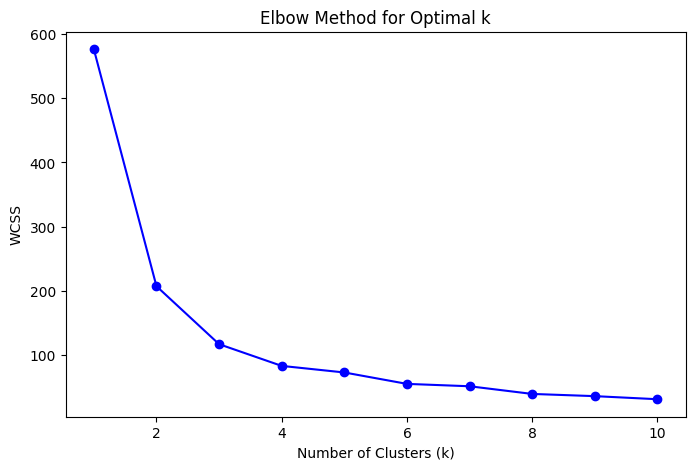

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [14]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
ent['cluster'] = kmeans.fit_predict(ent[['위도', '경도']])

cluster_centers = kmeans.cluster_centers_

map_kmeans = folium.Map(location=[36, 127], zoom_start=7)

cluster_colors = {i: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for i in range(num_clusters)}

for i in ent.index:
    lat = ent.loc[i, '위도']
    lon = ent.loc[i, '경도']
    cluster = ent.loc[i, 'cluster']
    color = cluster_colors[cluster]
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(map_kmeans)

map_kmeans

In [15]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
ent['cluster'] = kmeans.fit_predict(ent[['위도', '경도']])

cluster_centers = kmeans.cluster_centers_

map_kmeans_5 = folium.Map(location=[36, 127], zoom_start=7)

cluster_colors = {i: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for i in range(num_clusters)}

for i in ent.index:
    lat = ent.loc[i, '위도']
    lon = ent.loc[i, '경도']
    cluster = ent.loc[i, 'cluster']
    color = cluster_colors[cluster]
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(map_kmeans_5)

map_kmeans_5

In [16]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
ent['cluster'] = kmeans.fit_predict(ent[['위도', '경도']])

cluster_centers = kmeans.cluster_centers_

map_kmeans_6 = folium.Map(location=[36, 127], zoom_start=7)

cluster_colors = {i: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for i in range(num_clusters)}

for i in ent.index:
    lat = ent.loc[i, '위도']
    lon = ent.loc[i, '경도']
    cluster = ent.loc[i, 'cluster']
    color = cluster_colors[cluster]
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(map_kmeans_6)

map_kmeans_6

In [30]:
transport = pd.read_csv("수송실적 (2014~2021).csv")
transport

,2014,2015,2017,2019,2020,2021,단위(톤/년)
0,"78,725,776","82,978,123","62,462,156",60731522,"59,486,101","66,165,462",NaN
1,"107,036,284","107,428,390","128,243,301",127918333,"121,552,243","130,231,974",NaN
2,"36,262,317","33,701,343","38,120,941",38435607,"37,305,753","37,063,685",NaN
3,"175,224,257","170,293,266","211,748,891",198278299,"214,641,545","215,437,704",NaN
4,"22,994,164","22,585,066","26,745,609",26005640,"26,177,213","27,275,661",NaN
5,"7,028,483","6,724,963","9,654,187",10065380,"10,490,293","10,297,652",NaN
6,"124,062,593","123,973,007","122,765,106",144393442,"123,361,853","125,420,466",NaN
7,"305,895,352","293,034,354","274,717,222",293656053,"288,009,294","335,997,962",NaN
8,"57,672,337","61,230,168","86,818,287",85276658,"85,088,966","76,519,288",NaN
9,"64,747,930","64,664,883","83,815,941",70441296,"70,454,413","70,950,017",NaN


In [31]:
transport = transport.applymap(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)
transport.columns = ['2014', '2015', '2017', '2019', '2020', '2021', '단위(톤/년)']
locations = ["서울", "부산", "대구", "인천", "광주", "대전", "울산", "경기", "강원", "충북", "충남", "전북", "전남", "경북", "경남", "제주", "세종"]
transport['위치'] = locations

location_coords = {
    "서울": [37.5665, 126.9780], "부산": [35.1796, 129.0756], "대구": [35.8714, 128.6014],
    "인천": [37.4563, 126.7052], "광주": [35.1595, 126.8526], "대전": [36.3504, 127.3845],
    "울산": [35.5395, 129.3114], "경기": [37.4138, 127.5183], "강원": [37.8228, 128.1555],
    "충북": [36.6358, 127.4913], "충남": [36.5184, 126.8002], "전북": [35.7175, 127.1530],
    "전남": [34.8679, 126.9910], "경북": [36.5760, 128.5056], "경남": [35.4606, 128.2132],
    "제주": [33.4996, 126.5312], "세종": [36.4875, 127.2817]
}

C:\Users\USER\AppData\Local\Temp\ipykernel_21224\1346642272.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transport = transport.applymap(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)


In [32]:
map4 = folium.Map(location=[36.5, 127.5], zoom_start=7)

def create_barchart(data):
    fig, ax = plt.subplots(figsize=(2, 2))
    data.plot(kind='bar', ax=ax)
    ax.set_title("수송 실적 (톤/년)")
    ax.set_xticklabels(data.index, rotation=45)
    plt.tight_layout()
    
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    plt.close(fig)
    
    return image
    
for _, row in transport.iterrows():
    location = row['위치']
    coords = location_coords.get(location)
    if not coords:
        continue

    data = row[['2014', '2015', '2017', '2019', '2020', '2021']]
    
    image = create_barchart(data)
    html = f'<img src="data:image/png;base64,{image}">'
    iframe = folium.IFrame(html=html, width=250, height=250)
    popup = folium.Popup(iframe, max_width=300)
    
    folium.Marker(location=coords, popup=popup, tooltip=location).add_to(map4)
map4

C:\Users\USER\AppData\Local\Temp\ipykernel_21224\193415969.py:8: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_21224\193415969.py:8: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_21224\193415969.py:8: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_21224\193415969.py:8: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_21224\193415969.py:8: UserWarning: Glyph 53668 (\N{HANGUL SYLLABLE TON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_21224\193415969.py:8: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaV